<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/Analyse_Financiere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse financière avec python

Ce projet vise à analyser le cours des actions facbook et microsoft sur une période de 5 ans à travers une stratégie simple basée sur les signaux rapide (moyenne mobile de 10) et lent (moyenne mobile de 50).

Les données exploitées dans ce projet sont de yahoo finance. On a ajouté d'autres variables telles que la différence des prix, le return, le profit, le share, et la direction pour faire des analyses pertinentes.


In [3]:
# import des packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importons les données boursières
importons les données boursières de facebook et de microsoft

In [4]:
fb = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/META?period1=1549670400&period2=1707436800&interval=1d&events=history&includeAdjustedClose=true')
ms = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1549670400&period2=1707436800&interval=1d&events=history&includeAdjustedClose=true')

In [5]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-11,167.899994,168.300003,165.080002,165.789993,165.789993,12811200
1,2019-02-12,166.860001,168.339996,164.500000,165.039993,165.039993,16292300
2,2019-02-13,165.380005,166.220001,163.729996,164.070007,164.070007,14205100
3,2019-02-14,163.190002,164.869995,162.250000,163.949997,163.949997,12755200
4,2019-02-15,164.509995,164.699997,160.860001,162.500000,162.500000,15504400


In [6]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-11,106.199997,106.580002,104.970001,105.250000,99.945122,18914100
1,2019-02-12,106.139999,107.139999,105.480003,106.889999,101.502441,25056600
2,2019-02-13,107.500000,107.779999,106.709999,106.809998,101.426468,18394900
3,2019-02-14,106.309998,107.290001,105.660004,106.900002,101.511925,21784700
4,2019-02-15,107.910004,108.300003,107.360001,108.220001,102.765411,26606900


In [7]:
fb.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,240.797417,244.239754,237.615286,240.971828,240.971828,2.338454e+07
std,71.983128,72.598272,71.356444,72.015562,72.015562,1.559009e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,5.467500e+06
25%,183.755001,186.407505,181.652496,183.872501,183.872501,1.480228e+07
50%,227.590004,231.590004,223.775002,227.960007,227.960007,1.947715e+07
75%,301.739998,306.659988,298.817497,302.514992,302.514992,2.738590e+07
max,469.880005,485.959991,465.029999,474.989990,474.989990,2.323166e+08


In [8]:
ms.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,242.363688,244.868975,239.826717,242.470660,238.095275,2.927416e+07
std,73.222345,73.827271,72.596149,73.251288,74.476454,1.234708e+07
min,106.139999,106.580002,104.970001,105.250000,99.945122,8.989200e+06
25%,183.332501,185.682503,182.082497,183.607506,177.414436,2.153468e+07
50%,245.620003,248.720001,243.650002,246.634995,242.410576,2.622325e+07
75%,298.407509,300.869995,294.495011,298.737504,293.363991,3.328855e+07
max,414.049988,415.559998,412.529999,414.109985,414.109985,9.701270e+07


In [9]:
fb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [10]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


Text(0, 0.5, 'prix de cloture')

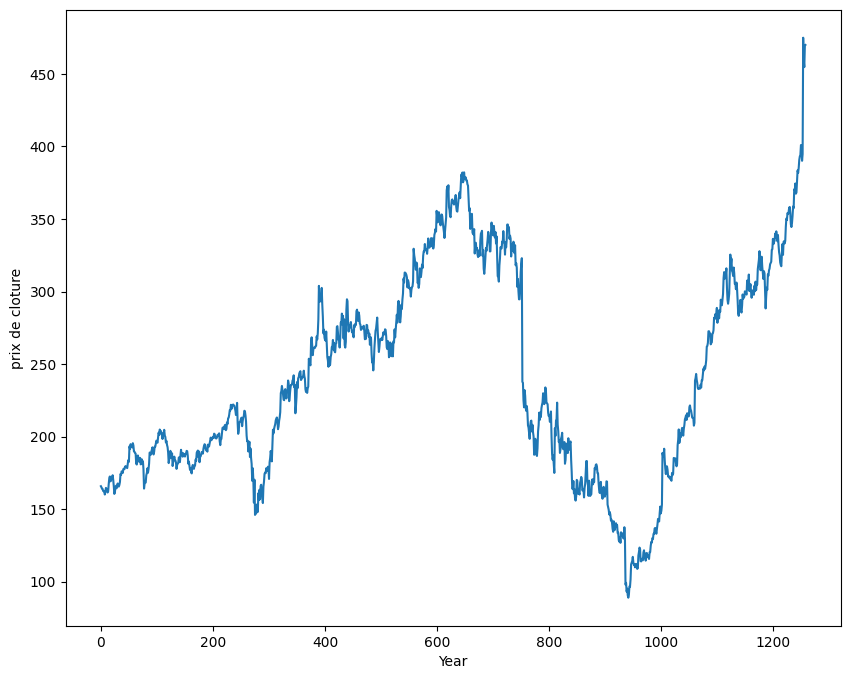

In [11]:
plt.figure(figsize=(10, 8))
fb['Close'].plot()
plt.xlabel("Year")
plt.ylabel("prix de cloture")

Text(0, 0.5, 'prix de cloture')

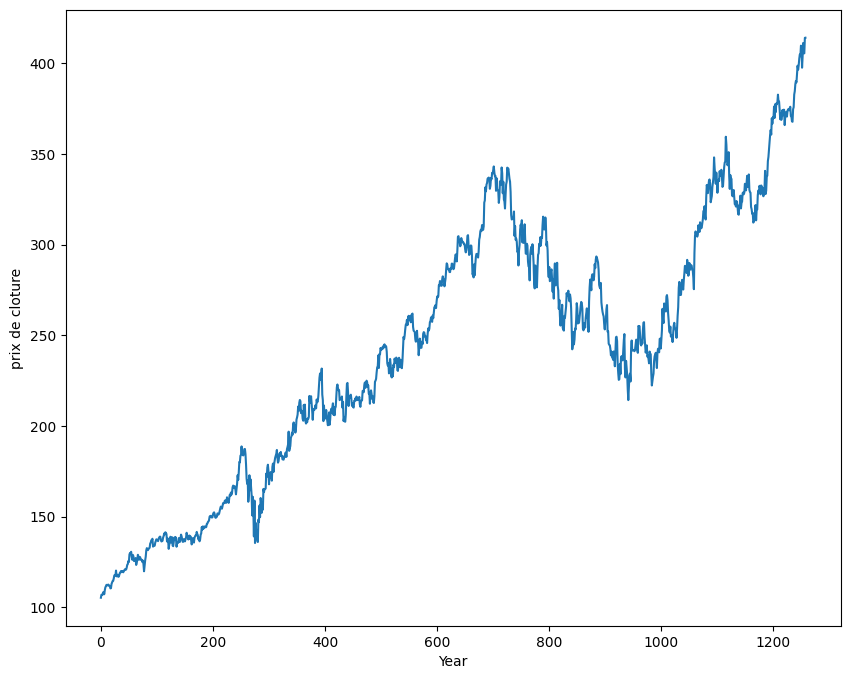

In [13]:
plt.figure(figsize=(10, 8))
ms['Close'].plot()
plt.xlabel("Year")
plt.ylabel("prix de cloture")

## Ajouter de nouvelles varibales
### Différence entre le prix et le prix de la veille



In [14]:
# la différence de prix
fb["Price_diff"] = fb['Close'].shift(-1) - fb['Close']
ms['Price_diff'] = ms['Close'].shift(-1) - ms['Close']
ms.iloc[0, 1]
ms.loc[0: 5, ["Close", "Price_diff"]]

,Close,Price_diff
0,105.250000,1.639999
1,106.889999,-0.080001
2,106.809998,0.090004
3,106.900002,1.319999
4,108.220001,-0.050003
5,108.169998,-1.019996


In [15]:
ll = ms[ms["Date"] == "2020-03-23"].index[0]
print("Le prix de différence de  microsoft le 23 mars 2023 est :", ms.iloc[ll, [7]], ".")

Le prix de différence de  microsoft le 23 mars 2023 est : Price_diff    12.36
Name: 280, dtype: object .


La différence de pris de microsoft le **2020-03-23** est : `12.36`.





In [16]:
hh = fb[fb["Date"] == "2023-03-31"].index[0]
print("Le prix de différence de facebook le 31 mars 2023 est : ", round(fb.iloc[hh, 7], 2), ".")

Le prix de différence de facebook le 31 mars 2023 est :  1.13 .


### Calculons le rerour quotidien qui est le ratio entre le prix de la différence et le prix de cloture : PriceDiff/Close.

In [17]:
fb["return"] = fb['Price_diff'] / fb['Close']
ms['return'] = ms['Price_diff'] / ms['Close']

In [18]:
cc = fb[fb["Date"] == "2022-02-24"].index[0]
print("Le return de facebook le jour de l'attaque de l'Ukraine par la Russie  est :", round(fb.iloc[cc, 8], 4))

Le return de facebook le jour de l'attaque de l'Ukraine par la Russie  est : 0.0139


In [19]:
rr = ms[ms["Date"] == "2022-02-24"].index[0]
print("Le return de microsoft le jour de l'attaque de l'Ukraine par la Russie est :", round(fb.iloc[rr, 8], 4))

Le return de microsoft le jour de l'attaque de l'Ukraine par la Russie est : 0.0139


### Créez une nouvelle colonne Direction.

In [20]:

#La compréhension de la liste signifie : si la différence de prix est supérieure à 0, notez 1, sinon, notez 0,
#pour chaque enregistrement du DataFrame - fb

fb["Direction"] = [1 if fb['Price_diff'].loc[ei] > 0  else 0 for ei in fb.index]
ms["Direction"] = [1 if ms['Price_diff'].loc[i] > 0 else 0 for i in ms.index]

In [21]:
print("La différence de prix est {}, le return est {}  et la direction est {} pour facebook le jour de l'attaque de l'Ukraine par la Russie.".format( round(fb.iloc[cc, 7], 2), round(fb.iloc[cc, 8], 2), round(fb.iloc[cc, 9], 2)))

La différence de prix est 2.88, le return est 0.01  et la direction est 1 pour facebook le jour de l'attaque de l'Ukraine par la Russie.


In [22]:
print("La différence de prix est {}, le return est {} et la direction est {} pour microsoft le jour de la guerre entre l'Ukraine et la Russie.".format(round(ms.iloc[cc, 7], 2), round(ms.iloc[cc, 8], 2), round(ms.iloc[cc, 9], 2)))

La différence de prix est 2.72, le return est 0.01 et la direction est 1 pour microsoft le jour de la guerre entre l'Ukraine et la Russie.


### Moyenne mobile

Créez une nouvelle colonne dans le DataFrame à l'aide du calcul de fenêtre glissante ``(.rolling()) ``

In [23]:
fb["moyenne_50"] = fb['Close'].rolling(50).mean()
ms["moyenne_50"] = ms['Close'].rolling(50).mean()

Visualisation graphiques

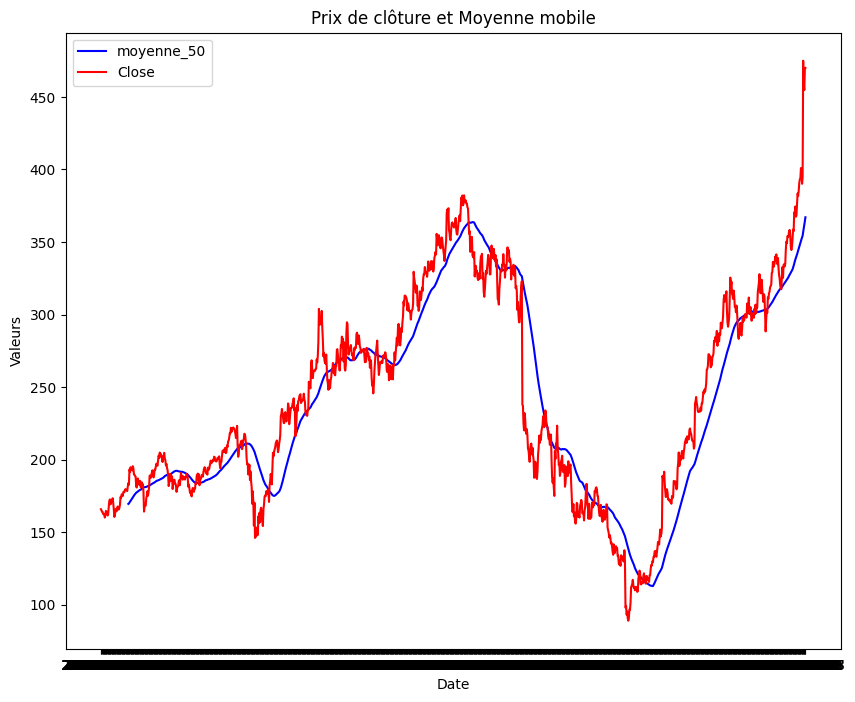

In [24]:
# facebook
plt.figure(figsize=(10, 8))
plt.plot(fb["Date"] , fb['moyenne_50'], label = "moyenne_50", color = "blue")
plt.plot(fb['Date'], fb['Close'], label = "Close", color = 'red')
plt.title('Prix de clôture et Moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

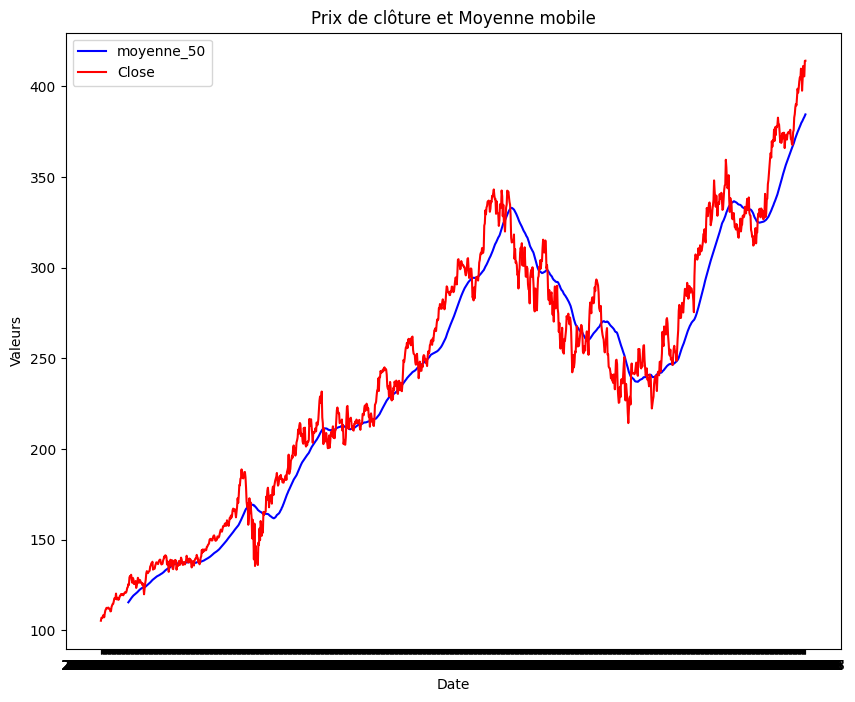

In [25]:
# microsoft
plt.figure(figsize=(10, 8))
plt.plot(ms["Date"], ms["moyenne_50"], label = "moyenne_50", color = "blue")
plt.plot(ms["Date"], ms["Close"], label = "Close", color = "Red")

# Ajouter des étiquettes et une légende
plt.title('Prix de clôture et Moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()

# Afficher le graphique
plt.show()

## Elaborons une stratégie de trading simple

La moyenne mobile de courte période est plus étroitement associée au changement récent du prix de l'action, ce que nous appelons le signal rapide. La moyenne mobile sur une longue période reflète la variation du prix sur une longue période, ce que nous appelons le signal lent. Nous créons MA10 et MA50, qui sont respectivement le signal rapide et le signal lent. Ensuite, nous traçons le prix de clôture MA10 et MA50. Si MA10 est plus grand que MA50, certains traders pensent que le prix de l'action va augmenter dans les prochains jours.

Dans le cas contraire, le prix diminuera. Notre stratégie est la suivante : si MA10 est supérieur à MA50, nous achèterons et conserverons une action. Autrement dit, nous achèterons une action.



Ajout de colonnes MA10

In [26]:
# pour facebook
fb['moyenne_10'] = fb['Close'].rolling(10).mean()
# pour microsoft
ms['moyenne_10'] = ms['Close'].rolling(10).mean()
fb = fb.dropna()
ms = ms.dropna()
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_diff,return,Direction,moyenne_50,moyenne_10
49,2019-04-23,124.099998,125.580002,123.830002,125.440002,119.626198,24025500,-0.430000,-0.003428,0,115.4000,121.691000
50,2019-04-24,125.790001,125.849998,124.519997,125.010002,119.216118,31257000,4.139992,0.033117,1,115.7952,122.264001
51,2019-04-25,130.059998,131.369995,128.830002,129.149994,123.164223,38033900,0.740005,0.005730,1,116.2404,123.160000
52,2019-04-26,129.699997,130.520004,129.020004,129.889999,123.869949,23654900,-0.119995,-0.000924,0,116.7020,124.116000
53,2019-04-29,129.899994,130.179993,129.350006,129.770004,123.755524,16324200,0.830002,0.006396,1,117.1594,124.998000


Nous pouvons créer une nouvelle variable appelée shares, pour indiquer si nous achetons ou non une action. Elle est créée à l'aide de la compréhension de liste. Shares est égal à 1 si MA10 est plus grand que MA50, sinon il est égal à zéro.

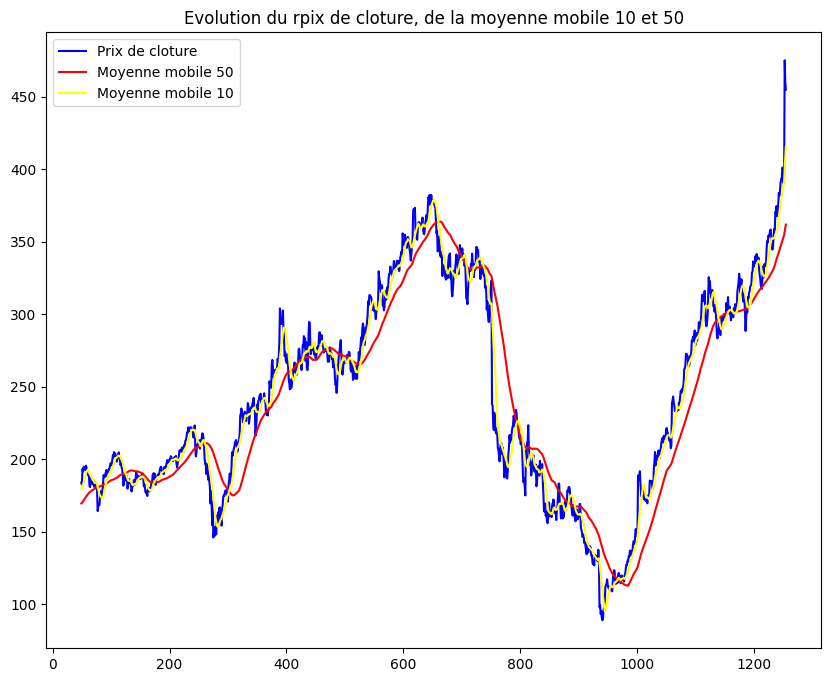

In [38]:
# facebook
plt.figure(figsize=(10,8))
plt.plot(fb['Close'], label = "Prix de cloture", color = 'blue')
plt.plot(fb['moyenne_50'], label = "Moyenne mobile 50", color = "Red")
plt.plot(fb['moyenne_10'], label = 'Moyenne mobile 10', color = "yellow")
plt.title("Evolution du rpix de cloture, de la moyenne mobile 10 et 50")
plt.legend()
plt.show()


On doit acheter et conserver l'action facebook les dates où la moyenne mobile 10 est superieure à la moyenne mobile 50.

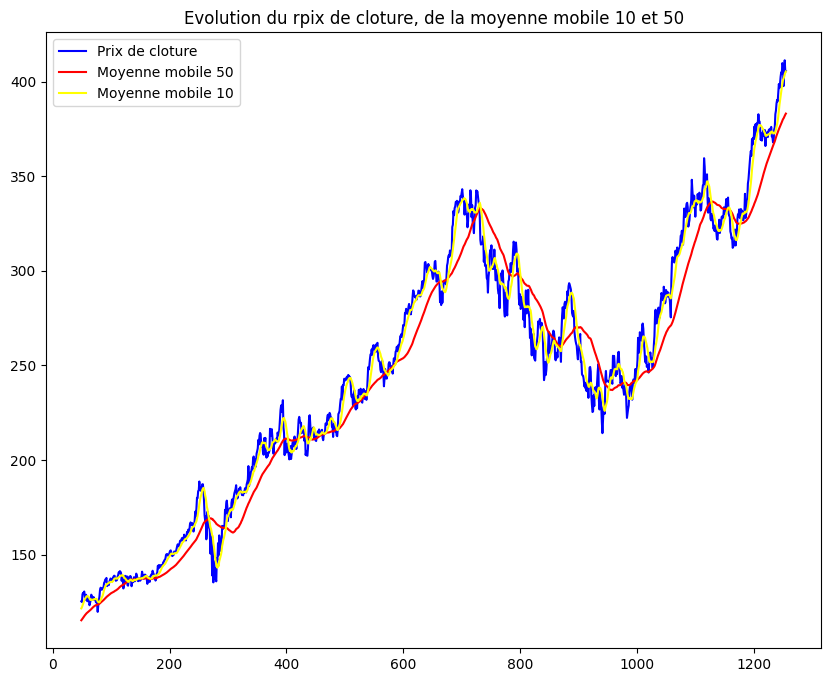

In [39]:
# microsoft
plt.figure(figsize=(10,8))
plt.plot(ms['Close'], label = "Prix de cloture", color = 'blue')
plt.plot(ms['moyenne_50'], label = "Moyenne mobile 50", color = "Red")
plt.plot(ms['moyenne_10'], label = 'Moyenne mobile 10', color = "yellow")
plt.title("Evolution du rpix de cloture, de la moyenne mobile 10 et 50")
plt.legend()
plt.show()


Ajouter une colonne "SHARE" pour prendre des décisions basées sur la stratégie.
Ajoutez une nouvelle colonne "Actions", si MA10> MA50, notez 1 (une action longue du stock), sinon, notez 0 (ne faites rien)

In [27]:
# pour facebook
fb["Share"] = [1 if fb.loc[i, "moyenne_10"] > fb.loc[i, "moyenne_50"] else 0 for i in fb.index]
ms["Share"] = [1 if ms.loc[i, "moyenne_10"] > ms.loc[i, "moyenne_50"] else 0 for i in ms.index]

<ipython-input-27-a9badc2d1beb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms["Share"] = [1 if ms.loc[i, "moyenne_10"] > ms.loc[i, "moyenne_50"] else 0 for i in ms.index]


Ajoutez une nouvelle colonne "Profit" en utilisant la compréhension de liste, pour toutes les lignes de fb, si Shares=1, le profit est calculé comme : `` le prix de clôture de demain - le cours de clôture d'aujourd'hui``. Sinon le profit est nul. Traçons un graphique pour montrer le profit/la perte.

Ajoutons le prix de cloture de demain

In [28]:
# pour facebook
fb["Close1"] = fb['Close'].shift(-1)
# pour microsoft
ms["Close1"] = ms['Close'].shift(-1)

<ipython-input-28-111b089bf97c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms["Close1"] = ms['Close'].shift(-1)


Ajoutons la colone profit

Ensuite, nous allons calculer le profit quotidien. Tout d'abord, nous créons la variable Close1, qui est le prix de clôture de demain. Ensuite, nous allons créer une nouvelle variable appelée Profit, qui est en fait le profit quotidien. Si shares est égal à un, le profit quotidien est égal au prix de clôture de demain moins le prix de clôture d'aujourd'hui. Il peut être positif ou négatif. S'il est négatif, nous perdons de l'argent ce jour-là. Si shares est égal à 0, cela signifie que nous n'avons pas de stock en main, le profit est égal à zéro. Nous pouvons tracer le profit et découvrir que certains jours nous gagnons de l'argent, d'autres jours nous en perdons. Nous pouvons calculer la richesse cumulée. Nous utilisons la méthode DataFrame, Cumsum pour calculer la somme cumulée et créer une nouvelle variable Wealth. Ensuite, nous vérifions la queue du DataFrame, et vérifions si nous gagnons ou perdons de l'argent.

In [29]:
# pour facebook
fb['profit'] = [(fb.loc[i, "Close1"] - fb.loc[i, "Close"]) if fb.loc[i, "Share"]==1 else 0 for i in fb.index]
fb = fb.dropna()

In [30]:
# pour microsoft
ms['profit'] = [(ms.loc[ei, "Close1"] - ms.loc[ei, "Close"]) if ms.loc[ei, "Share"] == 1 else 0 for ei in ms.index]
ms = ms.dropna()

<ipython-input-30-10ee1f9f4c25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms['profit'] = [(ms.loc[ei, "Close1"] - ms.loc[ei, "Close"]) if ms.loc[ei, "Share"] == 1 else 0 for ei in ms.index]


Visualisation du profit

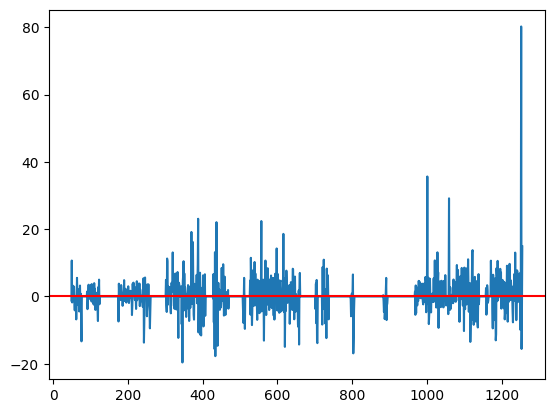

In [31]:
# pour facebook
plt.plot(fb['profit'])
plt.axhline(y = 0, color = "red")

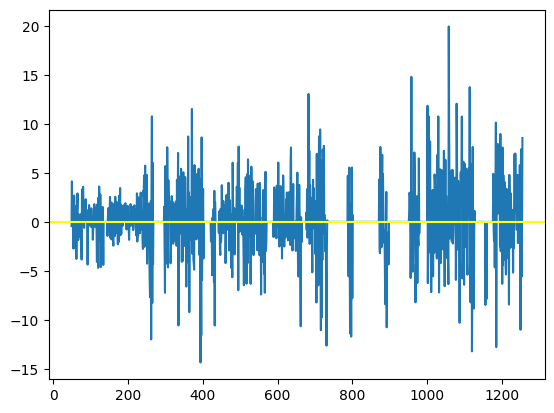

In [32]:
# pour microsoft
plt.plot(ms["profit"])
plt.axhline(y=0, color = "yellow")

Affichons les performances de notre modèle si nous suivons la stratégie. Avec la fonction ``.cumsum()`` calculons la richesse accumulée sur la période.

In [33]:
# pour facebook
fb["richesse"] = fb['profit'].cumsum()
fb.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,Price_diff,return,Direction,moyenne_50,moyenne_10,Share,Close1,profit,richesse
1251,2024-01-31,389.000000,398.000000,387.100006,390.140015,390.140015,20180800,4.639984,0.011893,1,353.117202,389.580005,1,394.779999,4.639984,236.679998
1252,2024-02-01,393.940002,400.500000,393.049988,394.779999,394.779999,29727100,80.209991,0.203176,1,354.312001,391.445004,1,474.989990,80.209991,316.889989
1253,2024-02-02,459.600006,485.959991,453.010010,474.989990,474.989990,84615500,-15.579986,-0.032801,0,357.012401,400.599002,1,459.410004,-15.579986,301.310003
1254,2024-02-05,469.880005,471.899994,459.220001,459.410004,459.410004,40832400,-4.690003,-0.010209,0,359.461001,408.362003,1,454.720001,-4.690003,296.620000
1255,2024-02-06,464.000000,467.119995,453.000000,454.720001,454.720001,21655200,14.869995,0.032701,1,361.725601,415.314002,1,469.589996,14.869995,311.489995


In [34]:
# pour facebook
ms["richesse"] = ms['profit'].cumsum()
ms.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_diff,return,Direction,moyenne_50,moyenne_10,Share,Close1,profit,richesse
1251,2024-01-31,406.959991,415.320007,397.209991,397.579987,397.579987,47871100,6.200012,0.015594,1,380.494401,401.519998,1,403.779999,6.200012,144.829941
1252,2024-02-01,401.829987,408.000000,401.799988,403.779999,403.779999,30657700,7.440002,0.018426,1,381.173001,402.510999,1,411.220001,7.440002,152.269943
1253,2024-02-02,403.809998,412.649994,403.559998,411.220001,411.220001,28245000,-5.570007,-0.013545,0,381.848601,403.765997,1,405.649994,-5.570007,146.699936
1254,2024-02-05,409.899994,411.160004,403.989990,405.649994,405.649994,25352300,-0.160004,-0.000394,0,382.500200,404.679996,1,405.489990,-0.160004,146.539932
1255,2024-02-06,405.880005,407.970001,402.910004,405.489990,405.489990,18382600,8.559998,0.021110,1,383.053000,405.338995,1,414.049988,8.559998,155.099930


Visualisation des profitc cumulés sur la période


Text(0.5, 1.0, "Le total de l'argent gagné est 297")

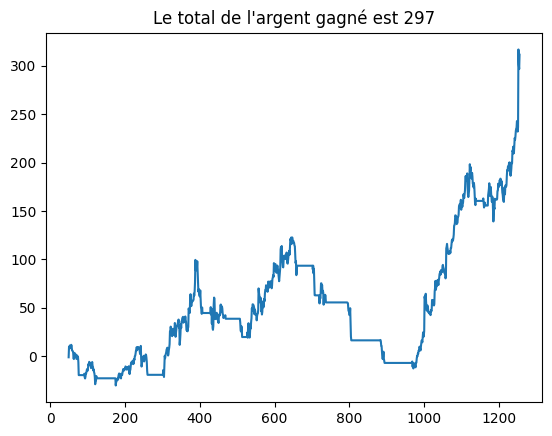

In [35]:
# pour facebook
plt.plot(fb['richesse'])
plt.title("Le total de l'argent gagné est {}".format(round(fb.loc[fb.index[-2], 'richesse'])))

Text(0.5, 1.0, "Le total de l'argent gagné est 147")

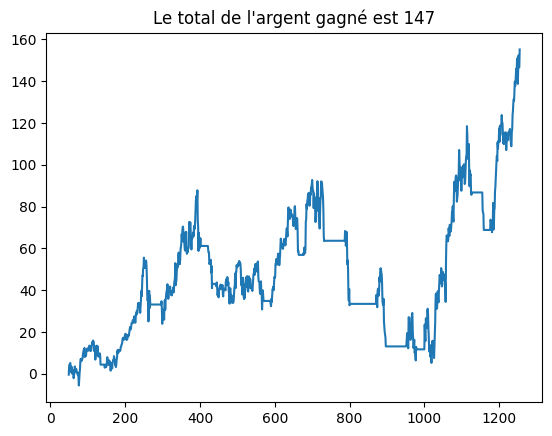

In [36]:
# pour microsoft
plt.plot(ms['richesse'])
plt.title("Le total de l'argent gagné est {}".format(round(ms.loc[fb.index[-2], 'richesse'])))

## **C'est juste une simple stratégie pour analyser le cours d'une action, elle n'est pas à adopter dans le monde réel car beaucoup de parametre entre en jeux.**

>**Merci pour votre attention**



